In [1]:
from fbprophet import Prophet
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from alpha_vantage.timeseries import TimeSeries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from datetime import datetime
import datetime as dt

In [2]:
def save_dataset(symbol):
    api_key = 'P33J9T7IVI663Y0A'

    ts = TimeSeries(key=api_key, output_format='pandas')
    data, meta_data = ts.get_daily(symbol, outputsize='full')

    data.to_csv(f'./DataOutput/{symbol}_daily.csv')
    print (data.head ())
    print (f'./DataOutput/{symbol}_daily.csv')

In [3]:
def csv_to_dataset_openclose(csv_path):
    data = pd.read_csv(csv_path)
    dateList = []
    yList = []
    row_count = len(data['1. open'])

    for i in range (row_count):
      dateList.append (str(data.date[i]) + ' 09:30:00')
      dateList.append (str(data.date[i]) + ' 16:00:00')
      yList.append (data['1. open'][i])
      yList.append (data['4. close'][i])

      data_openclose = pd.DataFrame ({'ds':dateList,'y':yList})
    
    data_volume = data.drop (["1. open",  "2. high",   "3. low",  "4. close"], axis=1)
    data_volume.rename (columns = {"date": "ds", "5. volume": "y"}, inplace = True)

    data_high = data.drop (["1. open",  "5. volume",   "3. low",  "4. close"], axis=1)
    data_high.rename (columns = {"date": "ds", "2. high": "y"}, inplace = True)    
    
    data_low = data.drop (["1. open",  "5. volume",   "2. high",  "4. close"], axis=1)
    data_low.rename (columns = {"date": "ds", "3. low": "y"}, inplace = True)    
    
    return data,data_openclose, data_volume, data_high, data_low

In [4]:
save_dataset('NOW')

            1. open  2. high   3. low  4. close  5. volume
date                                                      
2021-03-23   480.11   486.44  476.980    478.17  1140936.0
2021-03-22   471.63   484.44  471.320    476.65  1188290.0
2021-03-19   468.49   475.57  463.850    470.84  1893885.0
2021-03-18   479.69   479.80  464.665    466.18  1870161.0
2021-03-17   491.46   492.73  476.370    485.00  2485959.0
./DataOutput/NOW_daily.csv


In [5]:
def csv_to_dataset_volume(csv_path):
    data = pd.read_csv(csv_path)

    return data

In [6]:
data,data_openclose, data_volume, data_high, data_low = csv_to_dataset_openclose('./DataOutput/AC_daily.csv')

In [7]:
print (data_openclose.head ())
print (data_volume.head ())
print (data_high.head ())
print (data_low.head ())

                    ds      y
0  2021-03-23 09:30:00  36.70
1  2021-03-23 16:00:00  35.51
2  2021-03-22 09:30:00  37.14
3  2021-03-22 16:00:00  36.57
4  2021-03-19 09:30:00  35.84
           ds        y
0  2021-03-23  34242.0
1  2021-03-22  19961.0
2  2021-03-19  58352.0
3  2021-03-18  17318.0
4  2021-03-17  14375.0
           ds        y
0  2021-03-23  36.7000
1  2021-03-22  37.4500
2  2021-03-19  38.1300
3  2021-03-18  36.6300
4  2021-03-17  37.0339
           ds        y
0  2021-03-23  34.9900
1  2021-03-22  35.7300
2  2021-03-19  35.2506
3  2021-03-18  35.8450
4  2021-03-17  35.9000


In [8]:
model_openclose = Prophet(daily_seasonality=True)
model_volume = Prophet(daily_seasonality=True)
model_high = Prophet(daily_seasonality=True)
model_low = Prophet(daily_seasonality=True)

model_openclose.fit(data_openclose)
model_volume.fit(data_volume)
model_high.fit(data_high)
model_low.fit(data_low)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.


In [9]:
data_openclose.describe()

,y
count,2672.000000
mean,35.846545
std,3.973716
min,25.080000
25%,33.900000
50%,35.900000
75%,38.250000
max,64.900000


In [10]:
future_openclose_df = model_openclose.make_future_dataframe(periods=90)
future_volume_df = model_volume.make_future_dataframe(periods=90)
future_high_df = model_high.make_future_dataframe(periods=90)
future_low_df = model_low.make_future_dataframe(periods=90)

In [11]:
predictions_openclose = model_openclose.predict(future_openclose_df)
predictions_volume = model_volume.predict(future_volume_df)
predictions_high = model_high.predict(future_high_df)
predictions_low = model_low.predict(future_low_df)

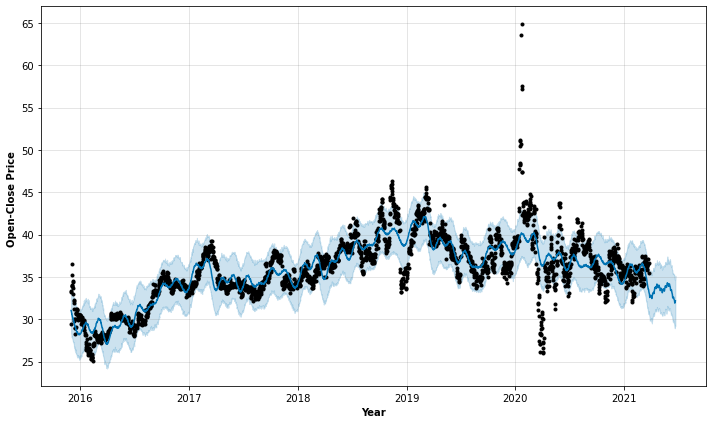

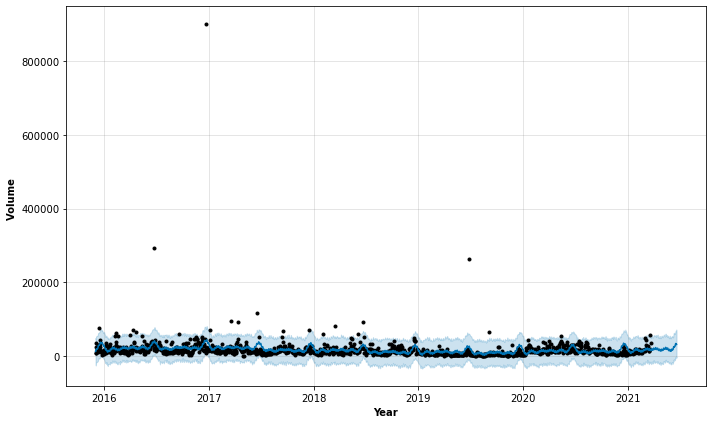

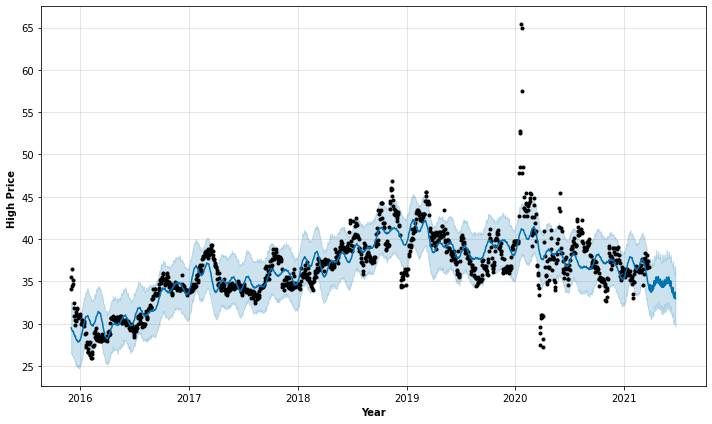

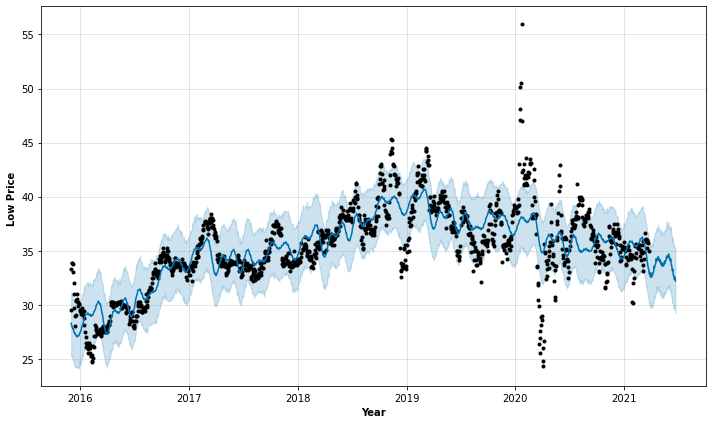

In [12]:
ax =model_openclose.plot(predictions_openclose)
plt.ylabel("Open-Close Price ", rotation='vertical', weight='bold')
plt.xlabel("Year",weight='bold')
plt.savefig("./DataOutput/AC_Open_Close.png")

model_volume.plot(predictions_volume)
plt.ylabel("Volume ", rotation='vertical', weight='bold')
plt.xlabel("Year",weight='bold')
plt.savefig("./DataOutput/AC_Volume.png")

model_high.plot(predictions_high)
plt.ylabel("High Price ", rotation='vertical', weight='bold')
plt.xlabel("Year",weight='bold')
plt.savefig("./DataOutput/AC_HighPrice.png")

model_low.plot(predictions_low)
plt.ylabel("Low Price ", rotation='vertical', weight='bold')
plt.xlabel("Year",weight='bold')
plt.savefig("./DataOutput/AC_LowPrice.png")

plt.show()

In [13]:
stock=data.copy()

In [14]:
stock.head()

,date,1. open,2. high,3. low,4. close,5. volume
0,2021-03-23,36.70,36.7000,34.9900,35.51,34242.0
1,2021-03-22,37.14,37.4500,35.7300,36.57,19961.0
2,2021-03-19,35.84,38.1300,35.2506,37.15,58352.0
3,2021-03-18,36.37,36.6300,35.8450,36.26,17318.0
4,2021-03-17,35.95,37.0339,35.9000,36.50,14375.0


In [15]:
stock.rename(columns={'date': 'Date',
                        '1. open': 'Open',
                       '2. high': 'High',
                        '3. low': 'Low',
                        '4. close': 'Close',
                        '5. volume': 'Volume'}, inplace=True)

In [16]:
stock.head()

,Date,Open,High,Low,Close,Volume
0,2021-03-23,36.70,36.7000,34.9900,35.51,34242.0
1,2021-03-22,37.14,37.4500,35.7300,36.57,19961.0
2,2021-03-19,35.84,38.1300,35.2506,37.15,58352.0
3,2021-03-18,36.37,36.6300,35.8450,36.26,17318.0
4,2021-03-17,35.95,37.0339,35.9000,36.50,14375.0


In [17]:
#percent change
# stock['high-low_pct']=(stock['High']-stock['Low']).pct_change()
#moving average
stock['ma_5']=stock['Close'].ewm(span=5).mean().shift(periods=1)
#std dev of the price over the past 5 days (how volitile the stock is)
stock['price_std_5']=stock['Close'].rolling(center=False, window=5).std().shift(periods=1)
#daily volume percent change
stock['volume_change_pct']=stock['Volume'].pct_change()
#Average Volume for th past 5 days
stock['volume_avg_5']=stock['Volume'].rolling(center=False, window=5).mean().shift(periods=1)
# stock['volume Close']=stock['Volume'].rolling(center=False,window=5).std().shift(periods=1)

In [18]:
stock['Date']= pd.to_datetime(stock['Date'])
start_date = min (stock['Date'])
stock['NumberOfDays'] = (stock['Date'] - start_date).dt.days

In [19]:
X = stock['NumberOfDays'].values.reshape (-1,1)
y = stock['Close'].values.reshape (-1,1)

In [20]:
print("Shape: ", X.shape, y.shape)

Shape:  (1336, 1) (1336, 1)


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [22]:
lr=LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [23]:
close_predictions=lr.predict(X_test)

In [24]:
close_predictions

array([[34.48659741],
       [33.57504784],
       [32.52178679],
       [37.8302225 ],
       [38.17492612],
       [36.81526185],
       [38.15194588],
       [37.94512371],
       [37.18294571],
       [35.57049879],
       [37.42806828],
       [37.63872049],
       [32.55625715],
       [34.51340769],
       [35.94967277],
       [36.72717093],
       [38.31663761],
       [39.21669706],
       [32.28049426],
       [39.05966541],
       [36.06840401],
       [33.00054181],
       [35.87307196],
       [36.63141992],
       [34.93471211],
       [39.20137689],
       [34.47510729],
       [35.25260545],
       [37.45487856],
       [37.32082716],
       [36.78845157],
       [33.62100833],
       [33.99635227],
       [38.19790636],
       [36.47055823],
       [35.26409557],
       [39.30861802],
       [33.27247467],
       [32.35709506],
       [36.49736851],
       [39.04434525],
       [34.50957765],
       [37.74596162],
       [32.20389345],
       [36.37480723],
       [33

Text(0, 0.5, 'Predicted Closing')

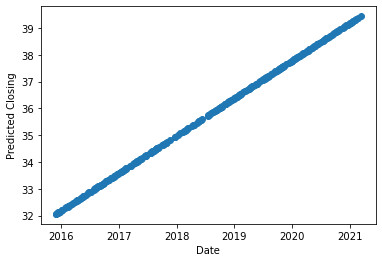

In [25]:
Date_Test = []
for i in range (len (X_test)):
    Date_Test.append(start_date + dt.timedelta(days=int(X_test[i][0])))
plt.scatter(Date_Test, close_predictions)
#plt.scatter(X_test, close_predictions)
plt.xlabel("Date")
plt.ylabel("Predicted Closing")

In [26]:
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.297738934177987
0.3234189845315122


In [27]:
last_date = max (stock['Date'])
max_NumberOfDays = max (stock['NumberOfDays'])

New_Xs = []
for i in range (1, 90):
    New_Xs.append (max_NumberOfDays + i)
NewXs = pd.DataFrame (New_Xs)
X_future = NewXs.values.reshape (-1,1)

In [28]:
X_future

array([[1940],
       [1941],
       [1942],
       [1943],
       [1944],
       [1945],
       [1946],
       [1947],
       [1948],
       [1949],
       [1950],
       [1951],
       [1952],
       [1953],
       [1954],
       [1955],
       [1956],
       [1957],
       [1958],
       [1959],
       [1960],
       [1961],
       [1962],
       [1963],
       [1964],
       [1965],
       [1966],
       [1967],
       [1968],
       [1969],
       [1970],
       [1971],
       [1972],
       [1973],
       [1974],
       [1975],
       [1976],
       [1977],
       [1978],
       [1979],
       [1980],
       [1981],
       [1982],
       [1983],
       [1984],
       [1985],
       [1986],
       [1987],
       [1988],
       [1989],
       [1990],
       [1991],
       [1992],
       [1993],
       [1994],
       [1995],
       [1996],
       [1997],
       [1998],
       [1999],
       [2000],
       [2001],
       [2002],
       [2003],
       [2004],
       [2005],
       [20

In [29]:
future_predictions=lr.predict(X_future)

In [30]:
future_predictions

array([[39.49245995],
       [39.49628999],
       [39.50012003],
       [39.50395007],
       [39.50778011],
       [39.51161015],
       [39.51544019],
       [39.51927023],
       [39.52310027],
       [39.52693031],
       [39.53076035],
       [39.53459039],
       [39.53842043],
       [39.54225047],
       [39.54608051],
       [39.54991055],
       [39.55374059],
       [39.55757063],
       [39.56140067],
       [39.56523071],
       [39.56906075],
       [39.57289079],
       [39.57672083],
       [39.58055087],
       [39.58438091],
       [39.58821095],
       [39.59204099],
       [39.59587103],
       [39.59970108],
       [39.60353112],
       [39.60736116],
       [39.6111912 ],
       [39.61502124],
       [39.61885128],
       [39.62268132],
       [39.62651136],
       [39.6303414 ],
       [39.63417144],
       [39.63800148],
       [39.64183152],
       [39.64566156],
       [39.6494916 ],
       [39.65332164],
       [39.65715168],
       [39.66098172],
       [39

In [31]:
for i in range (len (future_predictions)):
    Date_Test.append(start_date + dt.timedelta(days=int(X_future[i][0])))
Date_Test

[Timestamp('2017-08-25 00:00:00'),
 Timestamp('2016-12-30 00:00:00'),
 Timestamp('2016-03-30 00:00:00'),
 Timestamp('2020-01-15 00:00:00'),
 Timestamp('2020-04-14 00:00:00'),
 Timestamp('2019-04-25 00:00:00'),
 Timestamp('2020-04-08 00:00:00'),
 Timestamp('2020-02-14 00:00:00'),
 Timestamp('2019-07-30 00:00:00'),
 Timestamp('2018-06-04 00:00:00'),
 Timestamp('2019-10-02 00:00:00'),
 Timestamp('2019-11-26 00:00:00'),
 Timestamp('2016-04-08 00:00:00'),
 Timestamp('2017-09-01 00:00:00'),
 Timestamp('2018-09-11 00:00:00'),
 Timestamp('2019-04-02 00:00:00'),
 Timestamp('2020-05-21 00:00:00'),
 Timestamp('2021-01-11 00:00:00'),
 Timestamp('2016-01-27 00:00:00'),
 Timestamp('2020-12-01 00:00:00'),
 Timestamp('2018-10-12 00:00:00'),
 Timestamp('2016-08-02 00:00:00'),
 Timestamp('2018-08-22 00:00:00'),
 Timestamp('2019-03-08 00:00:00'),
 Timestamp('2017-12-20 00:00:00'),
 Timestamp('2021-01-07 00:00:00'),
 Timestamp('2017-08-22 00:00:00'),
 Timestamp('2018-03-13 00:00:00'),
 Timestamp('2019-10-

In [32]:
All_predictions = np.append (close_predictions, future_predictions)
All_predictions

array([34.48659741, 33.57504784, 32.52178679, 37.8302225 , 38.17492612,
       36.81526185, 38.15194588, 37.94512371, 37.18294571, 35.57049879,
       37.42806828, 37.63872049, 32.55625715, 34.51340769, 35.94967277,
       36.72717093, 38.31663761, 39.21669706, 32.28049426, 39.05966541,
       36.06840401, 33.00054181, 35.87307196, 36.63141992, 34.93471211,
       39.20137689, 34.47510729, 35.25260545, 37.45487856, 37.32082716,
       36.78845157, 33.62100833, 33.99635227, 38.19790636, 36.47055823,
       35.26409557, 39.30861802, 33.27247467, 32.35709506, 36.49736851,
       39.04434525, 34.50957765, 37.74596162, 32.20389345, 36.37480723,
       33.70143917, 34.67426938, 35.49389798, 39.12477609, 33.1422533 ,
       37.80341222, 33.56355772, 32.89713073, 37.40508804, 34.2376448 ,
       38.46600918, 33.91975146, 33.67462889, 33.27630471, 36.32884675,
       37.56594973, 35.17217461, 36.41310763, 32.06984205, 33.69377909,
       34.53638793, 39.24733738, 33.65164865, 37.83788258, 36.29

Text(0, 0.5, 'Predicted Closing')

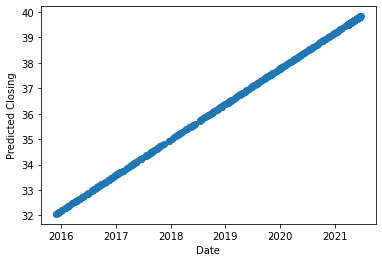

In [33]:
plt.scatter(Date_Test, All_predictions)
#plt.scatter(X_test, close_predictions)
plt.xlabel("Date")
plt.ylabel("Predicted Closing")
plt.savefig("./DataOutput/L_LowPrice.png")